In [1]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dropout, Dense, Conv1D, MaxPooling1D, Flatten, LeakyReLU, Input, Concatenate
from tensorflow import keras
import tensorflow as tf
import pickle
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn import metrics
import numpy as np
import pandas as pd

In [2]:
TRAIN_SET = '../ptb_train_set.pickle'
TEST_SET = '../ptb_test_set.pickle'

with open(TEST_SET, 'rb') as file:
    test_set = pickle.load(file)
    x_test = test_set['x']
    y_test = test_set['y']

with open(TRAIN_SET, 'rb') as file:
    train_set = pickle.load(file)
    x_train = train_set['x']
    y_train = train_set['y']
    
x_train_mlp = x_train
x_test_mlp = x_test
    
x_train = tf.expand_dims(x_train, axis=2)
x_test = tf.expand_dims(x_test, axis=2)
x_train.shape

TensorShape([13097, 187, 1])

In [3]:
CNN_model  = keras.models.load_model('CNN_REP')
LSTM_model = keras.models.load_model('LSTM_REP')
MLP_model  = keras.models.load_model('MLP_REP')

In [4]:
CNN = Model(inputs=CNN_model.input, outputs=CNN_model.layers[-9].output)
LSTM = Model(inputs=LSTM_model.input, outputs=LSTM_model.layers[-9].output)
MLP = Model(inputs=MLP_model.input, outputs=MLP_model.layers[-9].output)

In [5]:
opt = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)

CNN.compile(loss='binary_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [6]:
history_CNN = CNN.fit(x_train, y_train,
              batch_size=64,
              epochs=20,
              validation_data=(x_test, y_test),
              shuffle=True)

Epoch 1/20
205/205 [==============================] - 3s 12ms/step - loss: 1.2089 - accuracy: 0.6693 - val_loss: 0.3631 - val_accuracy: 0.8296
Epoch 2/20
205/205 [==============================] - 1s 7ms/step - loss: 0.3087 - accuracy: 0.8748 - val_loss: 0.2963 - val_accuracy: 0.8825
Epoch 3/20
205/205 [==============================] - 1s 7ms/step - loss: 0.2454 - accuracy: 0.9062 - val_loss: 0.2355 - val_accuracy: 0.9148
Epoch 4/20
205/205 [==============================] - 1s 7ms/step - loss: 0.2069 - accuracy: 0.9238 - val_loss: 0.2041 - val_accuracy: 0.9251
Epoch 5/20
205/205 [==============================] - 1s 7ms/step - loss: 0.1688 - accuracy: 0.9373 - val_loss: 0.1902 - val_accuracy: 0.9223
Epoch 6/20
205/205 [==============================] - 1s 7ms/step - loss: 0.1608 - accuracy: 0.9394 - val_loss: 0.1912 - val_accuracy: 0.9216
Epoch 7/20
205/205 [==============================] - 1s 7ms/step - loss: 0.1358 - accuracy: 0.9497 - val_loss: 0.1513 - val_accuracy: 0.9485
Epoch

In [7]:
opt = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)

LSTM.compile(loss='binary_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [8]:
history_LSTM = LSTM.fit(x_train, y_train,
              batch_size=64,
              epochs=20,
              validation_data=(x_test, y_test),
              shuffle=True)

Epoch 1/20
205/205 [==============================] - 16s 66ms/step - loss: 0.5142 - accuracy: 0.7392 - val_loss: 0.3651 - val_accuracy: 0.8048
Epoch 2/20
205/205 [==============================] - 15s 73ms/step - loss: 0.3366 - accuracy: 0.8350 - val_loss: 0.2957 - val_accuracy: 0.8715
Epoch 3/20
205/205 [==============================] - 15s 75ms/step - loss: 0.3078 - accuracy: 0.8636 - val_loss: 0.2862 - val_accuracy: 0.8797
Epoch 4/20
205/205 [==============================] - 15s 73ms/step - loss: 0.2507 - accuracy: 0.8976 - val_loss: 0.2083 - val_accuracy: 0.9203
Epoch 5/20
205/205 [==============================] - 15s 72ms/step - loss: 0.2270 - accuracy: 0.9027 - val_loss: 0.2081 - val_accuracy: 0.9182
Epoch 6/20
205/205 [==============================] - 15s 73ms/step - loss: 0.2075 - accuracy: 0.9167 - val_loss: 0.1992 - val_accuracy: 0.9271
Epoch 7/20
205/205 [==============================] - 15s 73ms/step - loss: 0.1803 - accuracy: 0.9349 - val_loss: 0.1901 - val_accuracy:

In [12]:
opt = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)

MLP.compile(loss='binary_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [13]:
history_MLP = MLP.fit(x_train_mlp, y_train,
              batch_size=64,
              epochs=20,
              validation_data=(x_test_mlp, y_test),
              shuffle=True)

Epoch 1/20
205/205 [==============================] - 12s 55ms/step - loss: 4.3706 - accuracy: 0.5533 - val_loss: 0.4258 - val_accuracy: 0.7876
Epoch 2/20
205/205 [==============================] - 11s 53ms/step - loss: 0.3950 - accuracy: 0.8102 - val_loss: 0.3750 - val_accuracy: 0.8247
Epoch 3/20
205/205 [==============================] - 11s 51ms/step - loss: 0.3616 - accuracy: 0.8317 - val_loss: 0.3671 - val_accuracy: 0.8165
Epoch 4/20
205/205 [==============================] - 12s 57ms/step - loss: 0.3426 - accuracy: 0.8450 - val_loss: 0.3336 - val_accuracy: 0.8399
Epoch 5/20
205/205 [==============================] - 11s 56ms/step - loss: 0.3333 - accuracy: 0.8481 - val_loss: 0.3162 - val_accuracy: 0.8584
Epoch 6/20
205/205 [==============================] - 11s 54ms/step - loss: 0.3159 - accuracy: 0.8578 - val_loss: 0.3305 - val_accuracy: 0.8488
Epoch 7/20
205/205 [==============================] - 11s 53ms/step - loss: 0.3270 - accuracy: 0.8522 - val_loss: 0.3043 - val_accuracy:

In [9]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
def plot_history(history):
    fig1, ax_acc = plt.subplots()
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Model Accuracy')
    plt.legend(['Training', 'Validation'], loc='lower right')
    plt.show()
    fig2, ax_loss = plt.subplots()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Model Loss')
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.legend(['Training', 'Validation'], loc='upper right')
    plt.show()
    
def plot_confusion(model, name):
    predictions = model.predict(x_test)
    matrix = confusion_matrix(y_test, np.round(predictions))
    df_cm = pd.DataFrame(matrix, range(2), range(2))
    plt.figure(figsize=(10,7))
    sn.set(font_scale=1.4) 
    labels = ["Normal", "Abnormal"]
    sn.heatmap(df_cm, annot=True, annot_kws={"size": 10}, xticklabels=labels, yticklabels=labels)
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title(name)
    plt.show()



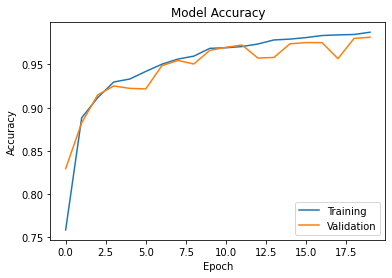

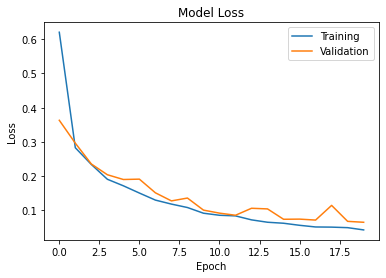

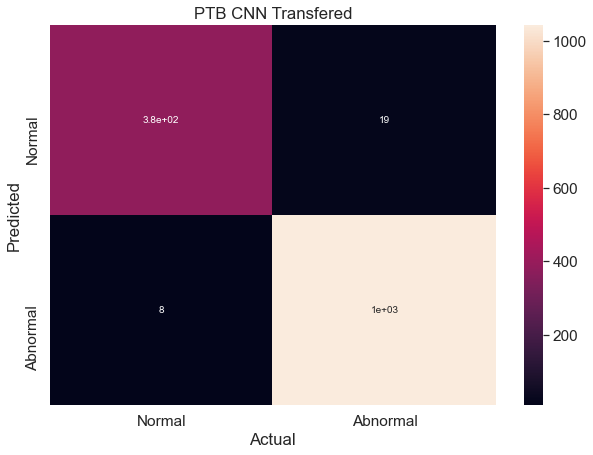

In [10]:
plot_history(history_CNN)
plot_confusion(CNN, "PTB CNN Transfered")

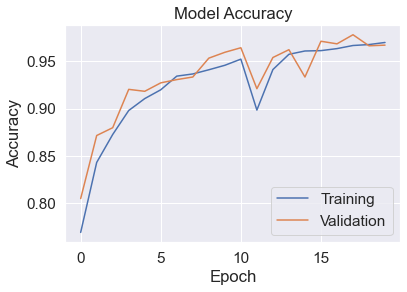

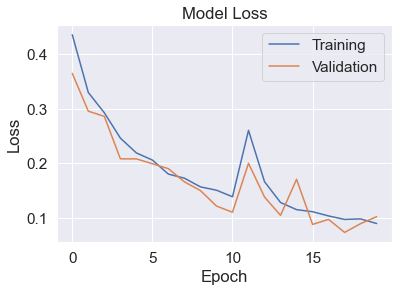

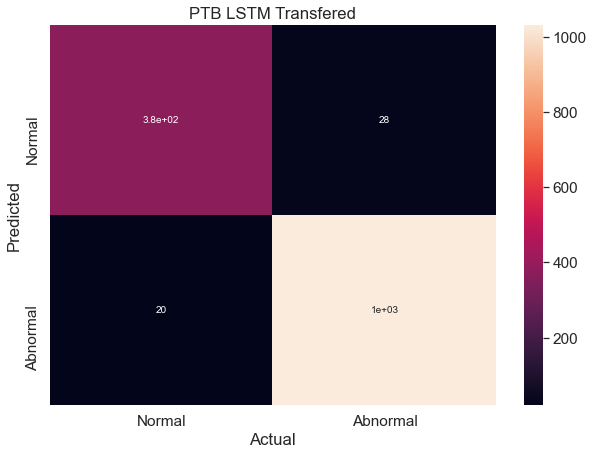

In [11]:
plot_history(history_LSTM)
plot_confusion(LSTM, "PTB LSTM Transfered")

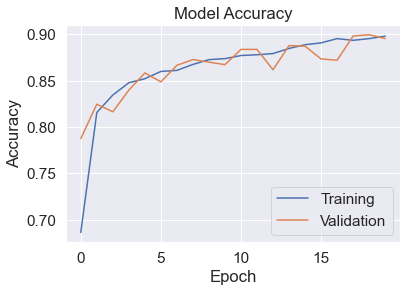

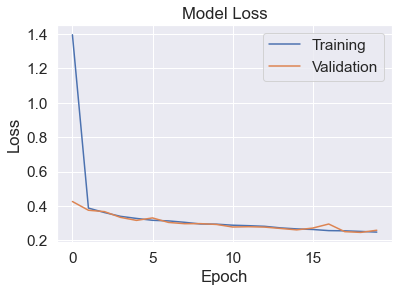

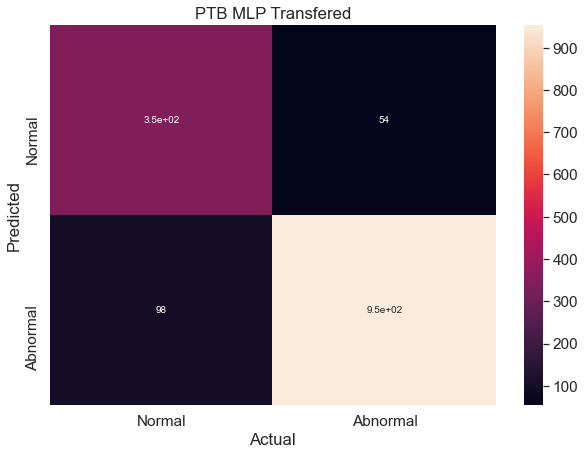

In [14]:
plot_history(history_MLP)
plot_confusion(MLP, "PTB MLP Transfered")

In [33]:
CNN.save("CNN_REP_PTB")
LSTM.save("LSTM_REP_PTB")
MLP.save("MLP_REP_PTB")

INFO:tensorflow:Assets written to: CNN_REP_PTB\assets


INFO:tensorflow:Assets written to: LSTM_REP_PTB\assets


INFO:tensorflow:Assets written to: LSTM_REP_PTB\assets


INFO:tensorflow:Assets written to: MLP_REP_PTB\assets


INFO:tensorflow:Assets written to: MLP_REP_PTB\assets
